In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [56]:
df = pd.read_csv('combined_data.csv')

In [57]:
display(df.head())

,Cell_Type,Phase Volume,Phase_Variance,Phase_Surface_Area_to_Volume_Ratio,Phase_Skewness,Dry_Mass,Phase_Sphericity_Index,Phase_Surface_Area_to_Dry_Mass_Ratio,Mean_OPD,Projected_Area_To_Volume,Phase_Kurtosis,Energy,Median_OPD,Phase_Surface_Area,Density
0,Hek,3309.074158,57.654616,0.403143,0.342372,1.654537e+04,0.804988,0.080629,47.957596,0.020852,2.248171,3.920514e+03,47.083150,1334.030093,239.787982
1,Hek,3630.107691,923.235217,1.130838,-0.288402,1.815054e+04,0.278255,0.226168,46.539842,0.021487,1.790718,7.108911e+04,53.856019,4105.065431,232.699211
2,Hek,38236.014425,14237.096896,3.787462,1.703172,1.911801e+05,0.037900,0.757492,39.995831,0.025003,5.769890,1.359643e+07,0.000000,144817.461365,199.979155
3,Hek,52.984288,663.753975,209.137328,-0.172664,2.649214e+02,0.006157,41.827466,0.210255,4.756127,1.972272,1.666022e+05,0.000000,11080.992327,1.051276
4,Hek,224270.162358,7023.222553,1.455073,0.285291,1.121351e+06,0.054703,0.291015,58.817247,0.017002,3.030987,2.677252e+07,41.627913,326329.532081,294.086234


In [58]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
print(df.isnull().sum())

Cell_Type                                0
Phase Volume                             0
Phase_Variance                          48
Phase_Surface_Area_to_Volume_Ratio      22
Phase_Skewness                          48
Dry_Mass                                 0
Phase_Sphericity_Index                  65
Phase_Surface_Area_to_Dry_Mass_Ratio    22
Mean_OPD                                 0
Projected_Area_To_Volume                22
Phase_Kurtosis                          48
Energy                                   0
Median_OPD                               0
Phase_Surface_Area                       0
Density                                  0
dtype: int64


In [60]:
df = df.dropna()


In [61]:
print(df.isnull().sum())


Cell_Type                               0
Phase Volume                            0
Phase_Variance                          0
Phase_Surface_Area_to_Volume_Ratio      0
Phase_Skewness                          0
Dry_Mass                                0
Phase_Sphericity_Index                  0
Phase_Surface_Area_to_Dry_Mass_Ratio    0
Mean_OPD                                0
Projected_Area_To_Volume                0
Phase_Kurtosis                          0
Energy                                  0
Median_OPD                              0
Phase_Surface_Area                      0
Density                                 0
dtype: int64


In [62]:
display(df.describe())

,Phase Volume,Phase_Variance,Phase_Surface_Area_to_Volume_Ratio,Phase_Skewness,Dry_Mass,Phase_Sphericity_Index,Phase_Surface_Area_to_Dry_Mass_Ratio,Mean_OPD,Projected_Area_To_Volume,Phase_Kurtosis,Energy,Median_OPD,Phase_Surface_Area,Density
count,1.270100e+04,12701.000000,1.270100e+04,12701.000000,1.270100e+04,12701.000000,12701.000000,12701.000000,12701.000000,12701.000000,1.270100e+04,12701.000000,12701.000000,12701.000000
mean,1.432731e+05,2309.356619,7.226967e+02,0.221305,7.163655e+05,0.076960,144.539335,39.726731,16.633226,2.817725,7.570045e+06,32.646892,149967.718368,198.633653
std,1.602298e+05,2805.658677,1.623507e+04,0.525851,8.011488e+05,0.060122,3247.013722,43.012475,353.705246,1.583773,9.310891e+06,46.636229,74065.326791,215.062373
min,5.021440e-02,36.824361,6.844343e-02,-7.597107,2.510720e-01,0.000009,0.013689,0.000033,0.001738,1.123364,3.920514e+03,0.000000,132.497530,0.000164
25%,1.931137e+04,753.389130,7.440269e-01,-0.078226,9.655684e+04,0.030914,0.148805,8.121518,0.017599,2.085542,2.266938e+06,0.000000,101406.575628,40.607591
50%,1.046342e+05,1336.317637,1.306144e+00,0.163959,5.231711e+05,0.075646,0.261229,28.131429,0.035547,2.401772,5.172868e+06,14.867541,137186.645748,140.657146
75%,2.081340e+05,2982.527163,5.511154e+00,0.427010,1.040670e+06,0.109747,1.102231,56.822184,0.123130,3.002676,9.807839e+06,49.058932,183179.781414,284.110921
max,2.988205e+06,71035.503986,1.314639e+06,5.858979,1.494103e+07,1.404645,262927.746593,575.317681,30409.603345,69.024662,4.808393e+08,576.766310,856510.425754,2876.588404


In [63]:
label_encoder = LabelEncoder()
df['Cell_Type'] = label_encoder.fit_transform(df['Cell_Type'])

In [64]:
scaler = StandardScaler()
X = df.drop(columns=['Cell_Type'])
X_scaled = scaler.fit_transform(X)

In [65]:
y = df['Cell_Type']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=70)

In [67]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
y_pred = model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9709


In [70]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

        A375       0.97      0.96      0.97      1064
         Hek       0.97      0.98      0.97      1477

    accuracy                           0.97      2541
   macro avg       0.97      0.97      0.97      2541
weighted avg       0.97      0.97      0.97      2541



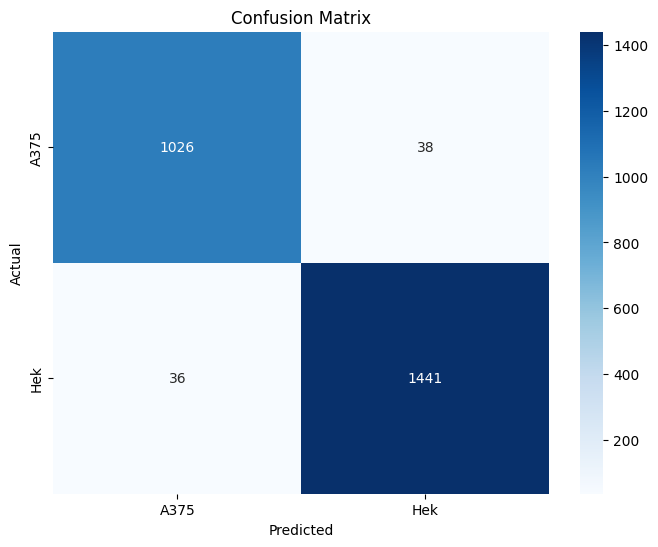

In [71]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
coefficients = pd.DataFrame(model.coef_.T, columns=['Coefficient'], index=X.columns)
print("Model Coefficients:")
display(coefficients)

Model Coefficients:


,Coefficient
Phase Volume,-3.265054
Phase_Variance,3.544431
Phase_Surface_Area_to_Volume_Ratio,1.145795
Phase_Skewness,-0.877788
Dry_Mass,-3.265054
Phase_Sphericity_Index,-3.016028
Phase_Surface_Area_to_Dry_Mass_Ratio,1.145795
Mean_OPD,2.779873
Projected_Area_To_Volume,-1.163091
Phase_Kurtosis,3.965300
